<a href="https://colab.research.google.com/github/zichengliao/pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
!git clone https://github.com/zichengliao/pix2pix.git

Cloning into 'pix2pix'...
remote: Enumerating objects: 2373, done.
remote: Counting objects: 100% (2373/2373), done.
remote: Compressing objects: 100% (692/692), done.
remote: Total 2373 (delta 1679), reused 2355 (delta 1671), pack-reused 0
Receiving objects: 100% (2373/2373), 7.99 MiB | 24.13 MiB/s, done.
Resolving deltas: 100% (1679/1679), done.


In [2]:
import os
os.chdir('pix2pix/')

In [3]:
import os
os.getcwd()


'/Users/zichengliao/PycharmProjects/pix2pix'

In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 127.9 MB 122 kB/s eta 0:00:01
     |████████████████████████████████| 13.8 MB 999 kB/s eta 0:00:01
  Using cached dominate-2.6.0-py2.py3-none-any.whl (29 kB)
  Using cached visdom-0.1.8.9.tar.gz (676 kB)
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
     |████████████████████████████████| 3.0 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 17.0 MB 730 kB/s eta 0:00:01
     |████████████████████████████████| 32.8 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 150 kB/s eta 0:00:01
  Using cached jsonpatch-1.32-py2.py3-none-any.whl (12 kB)
  Using cached torchfile-0.1.0.tar.gz (5.2 kB)
  Using cached websocket_client-1.2.1-py2.py3-none-any.whl (52 kB)
  Using cached jsonpointer-2.1-py2.py3-none-any.whl (7.4 kB)
     |████████████████████████████████| 59 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 1.6 MB/s eta 0:00:01
  Created wheel for visdom: filename=visdom-0.1

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [ ]:
!bash ./datasets/download_pix2pix_dataset.sh facades

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA

In [5]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --n_epochs 5 --n_epochs_decay 5

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                       

In [7]:
!cp checkpoints/facades_pix2pix/latest_net*.pth . 

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [4]:
!ls checkpoints/facades_pix2pix

latest_net_G.pth loss_log.txt     train_opt.txt    web


In [4]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

# Visualize

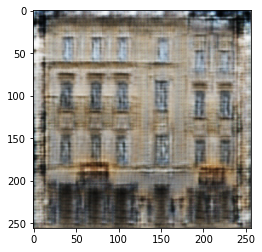

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_pix2pix/test_latest/images/100_fake_B.png')
plt.imshow(img)

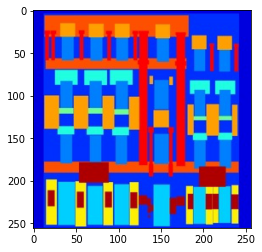

In [ ]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/100_real_A.png')
plt.imshow(img)

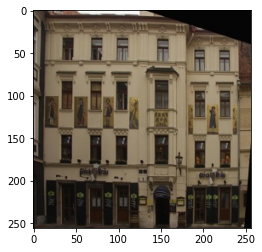

In [ ]:
img = plt.imread('./results/facades_pix2pix/test_latest/images/100_real_B.png')
plt.imshow(img)